In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
df=pd.read_csv('data.csv',names=['vendor_name','model_name','MYCT','MMIN','MMAX','CACH',
'CHMIN','CHMAX','PRP','ERP'])

In [6]:
df.head(2)

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


In [7]:
X=df.drop(labels=['ERP'],axis=1)


In [8]:
y=df[['ERP']]

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:

X.shape

(209, 246)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((167, 246), (42, 246))

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0014
- Mean Absolute Error: 0.0011
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.2005
- Mean Absolute Error: 23.8336
- R2 Score: 0.9474


Lasso
Model performance for Training set
- Root Mean Squared Error: 26.2634
- Mean Absolute Error: 16.3573
- R2 Score: 0.9570
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 56.5137
- Mean Absolute Error: 25.1887
- R2 Score: 0.9406


Ridge
Model performance for Training set
- Root Mean Squared Error: 11.9004
- Mean Absolute Error: 7.7951
- R2 Score: 0.9912
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.8196
- Mean Absolute Error: 23.9399
- R2 Score: 0.9461


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 44.8203
- Mean Absolute Error: 17.3820
- R2 Score: 0.8749
------------

g:\computer hardware\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 16.6413
- Mean Absolute Error: 5.6225
- R2 Score: 0.9828
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 80.8721
- Mean Absolute Error: 23.0579
- R2 Score: 0.8783


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0872
- Mean Absolute Error: 0.0763
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 80.0935
- Mean Absolute Error: 23.8142
- R2 Score: 0.8807


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 1.2756
- Mean Absolute Error: 1.0629
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 75.6057
- Mean Absolute Error: 16.5722
- R2 Score: 0.8937


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 19.2275
- Mean Absolute Error: 16.7053
- R2 Sc

g:\computer hardware\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.947350
2,Ridge,0.946118
1,Lasso,0.940588
7,CatBoosting Regressor,0.893666
8,AdaBoost Regressor,0.885111
6,XGBRegressor,0.880667
5,Random Forest Regressor,0.878336
4,Decision Tree,0.877975
3,K-Neighbors Regressor,0.702219


In [16]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.74


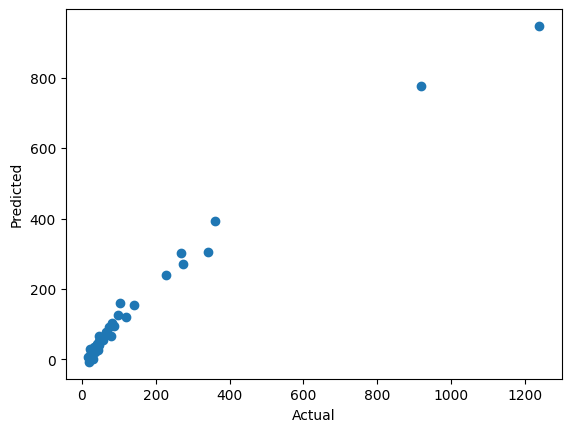

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

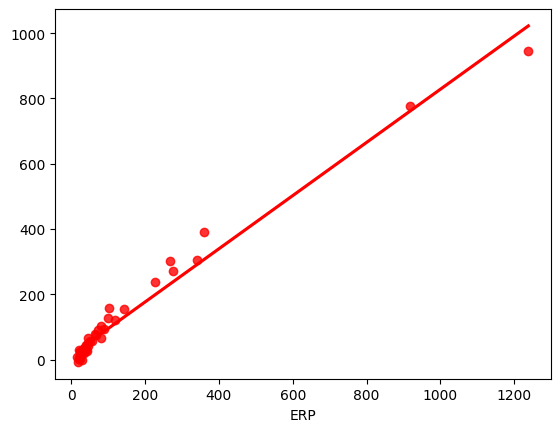

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [19]:
import pandas as pd

# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()

# Ensure y_pred is a one-dimensional array
y_pred_values = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred.flatten()

# Create the DataFrame pred_df
pred_df = pd.DataFrame({'Actual Value': y_test_values, 'Predicted Value': y_pred_values, 'Difference': y_test_values - y_pred_values})

# Display pred_df
print(pred_df)

print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

    Actual Value  Predicted Value  Difference
0            102       159.395996  -57.395996
1             25        22.076241    2.923759
2             25        11.785200   13.214800
3            919       776.282054  142.717946
4             34        35.425499   -1.425499
5            267       300.934631  -33.934631
6             41        44.646757   -3.646757
7             19        -7.202688   26.202688
8           1238       946.840457  291.159543
9            227       238.298536  -11.298536
10            88        93.617813   -5.617813
11            99       127.144349  -28.144349
12            41        40.842729    0.157271
13            44        27.715015   16.284985
14            64        76.992339  -12.992339
15            23        10.933660   12.066340
16            80        65.948073   14.051927
17            22         3.049588   18.950412
18           142       154.309449  -12.309449
19            82       103.576921  -21.576921
20            52        56.249905 

In [21]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'K-Neighbors Regressor',
 'Decision Tree',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor',
 'AdaBoost Regressor']